## Importuję biblioteki :
* NumPy - do obliczeń numerycznych
* matplotlib - do wykresów

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename = 'data_04.csv'
x = np.genfromtxt(filename)

print(len(x))
x

100000


array([5.25033424, 6.2263371 , 5.54333856, ..., 6.91887064, 5.26202722,
       3.35973106])

### Policzymy teraz kwantyl rzędu 0.35 na dwa sposoby
* z definicji
* za pomocą gotowej funkcji z biblioteki NumPy

In [3]:
alpha = 0.25
x = np.sort(x)

# kwantyl z definicji
q1 = x[int(alpha*len(x))]
print(f'Kwantyl rzędu {alpha} = {q1:.2f}')

Kwantyl rzędu 0.25 = 3.52


In [4]:
# kwantyl za pomocą funkcji z NumPy
q2 = np.quantile(x, alpha)
print(f'Kwantyl rzędu {alpha} = {q2:.2f}')

Kwantyl rzędu 0.25 = 3.52


## Wykresy - Stworzymy dwie ładne grafiki:
* Jeden wykres - histogram danych
* Trzy wykresy -histogram, boxplot, dystrybuanta
* Ładnie je sformatujemy i zaznaczymy kwantyle

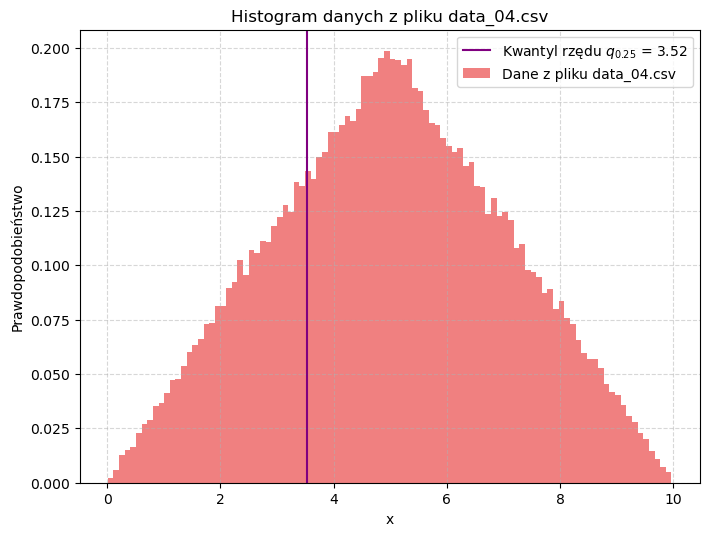

In [5]:
# pierwszy parametr figsize=(8,6) oznacza format obrazu - proporcje szerokosci do wysokości
# drugi argumentdpi = oznacza liczbę pikseli na cal - im więcej tym większa rozdzielczość obrazu
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# dodaję wykresy do grafiki histogram oraz kwantyl
bins=100
ax.hist(x, bins=bins, color='lightcoral', density=True, label=f'Dane z pliku {filename}')
ax.axvline(q1, color='purple', label=r'Kwantyl rzędu $q_{0.25}$' + f' = {q1:.2f}')

# podpisuję wykres
ax.set_title(f'Histogram danych z pliku {filename}')
ax.set_xlabel('x')
ax.set_ylabel('Prawdopodobieństwo')

# upiększam wykres
ax.grid(ls='--', alpha=0.5)

# dodaję legendę
ax.legend()

# zapisuję do pliku - rozszerzenie .svg oznacza grafikę wektorową
# skaluje się ona z rozdzielczością i nigdy nie będzie pikselowata
# w przeciwieństwie do formatów jak .png czy .jpg
plt.savefig('histogram.svg', 
            transparent=True,
            bbox_inches='tight')

plt.show()

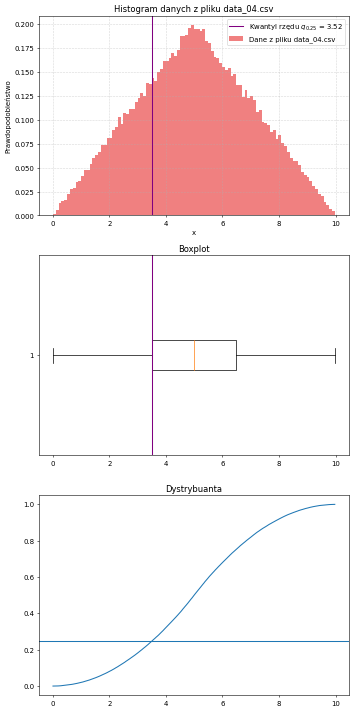

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(8,18), dpi=50)

# Pierwszy wykres - histogram
bins=100
ax1.hist(x, bins=bins, color='lightcoral', density=True, label=f'Dane z pliku {filename}')
ax1.axvline(q1, color='purple', label=r'Kwantyl rzędu $q_{0.25}$' + f' = {q1:.2f}')

ax1.set_title(f'Histogram danych z pliku {filename}')
ax1.set_xlabel('x')
ax1.set_ylabel('Prawdopodobieństwo')

ax1.grid(ls='--', alpha=0.5)
ax1.legend()

# drugi wykres - boxplot
ax2.boxplot(x, vert=False)
ax2.axvline(q1, color='purple', label=r'Kwantyl rzędu $q_{0.25}$' + f' = {q1:.2f}')
ax2.set_title('Boxplot')

# trzeci wykres - dystrybuanta
x = np.sort(x)
y = np.arange(0,1,1/len(x))

ax3.plot(x, y)
ax3.axhline(alpha)
ax3.set_title('Dystrybuanta')

plt.show()

## Specjalnie zostawiam nie-upiększone wykresy boxplotu i dystrybuanty, abyście mogli się pobawić kolorami, ustawieniami, przeźroczystością, stylami i czymkolwiek jeszcze chcecie ;)
* https://www.geeksforgeeks.org/matplotlib-tutorial/
